# Análisis número de medidas

**Autor**: Jesús del Hoyo

**Fecha**:   14/06/2019

**Proyecto**: Ecograb project, polariscope callibration

**Descripción**:

Aquí vamos a analizar el efecto del número de medidas en los pasos de calibración. Se hará tanto para aquellos pasos en los que solo se rote un motor (Pasos 1D) como dos motores (Pasos 2D).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [2]:
import polaripython.auxiliar.analysis_N_measures as analysis
import numpy as np
from scipy import optimize
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [3]:
plt.rcParams.update({'xtick.labelsize': 12,
                     'ytick.labelsize': 12,
                     'xtick.major.size' : 7,
                     'xtick.major.width' : 2,
                     'ytick.major.size' : 7,
                     'ytick.major.width' : 2,
                     'xtick.minor.size' : 4,
                     'xtick.minor.width' : 2,
                     'ytick.minor.size' : 4,
                     'ytick.minor.width' : 2,
                     'axes.linewidth' : 2
                    })

## Pasos 1D

Me quedo solo con los ejemplos del Paso 5a porque es el más general que tenemos.

In [18]:
# N_1D, N_1D_both, error_1D_ret, error_1D_pol, error_1D_both = analysis.Otros_1D()
N_1D, error_1D_abs, error_1D_rel, param_1D = analysis.Otros_1D()

Elapsed time is 875.1185276508331 s.


## Representar resultados

Ahora vamos a representar el resultado obtenido. Hay que visualizarlo correctamente.

Primero empezamos con los parámetros globales de las figuras

Figura a: errores

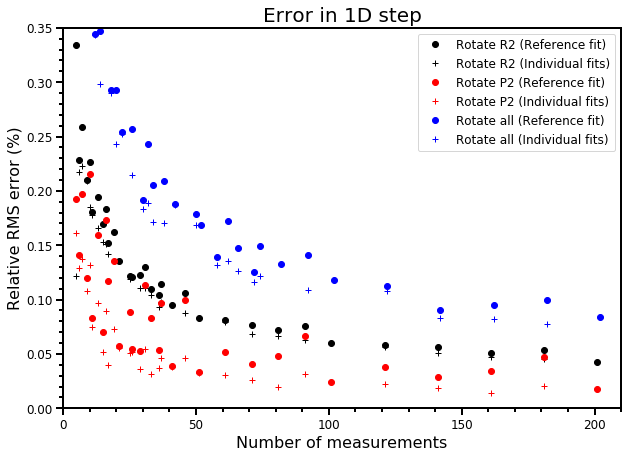

In [23]:
legend = ('Rotate R2 (Reference fit)', 'Rotate R2 (Individual fits)', 
          'Rotate P2 (Reference fit)', 'Rotate P2 (Individual fits)', 
          'Rotate all (Reference fit)', 'Rotate all (Individual fits)',
         )

# Figura
fig, ax = plt.subplots(figsize=(10,7))

# Plot errors
ax.plot(N_1D, error_1D_abs[0]*100,'ko')
ax.plot(N_1D, error_1D_rel[0]*100,'k+')
ax.plot(N_1D, error_1D_abs[1]*100,'ro')
ax.plot(N_1D, error_1D_rel[1]*100,'r+')
ax.plot(2*N_1D, error_1D_abs[2]*100,'bo')
ax.plot(2*N_1D, error_1D_rel[2]*100,'b+')

# Labels
plt.title('Step 5a', fontsize=20)
plt.xlabel('Number of measurements', fontsize=16)
plt.ylabel('Relative RMS error (%)', fontsize=16)
plt.xlim([0, 210])
plt.ylim([0, 0.35])
plt.legend(legend, fontsize=12)

# Ticks
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
# ax.tick_params(which='both', width=2)
# ax.tick_params(which='major', length=7)
# ax.tick_params(which='minor', length=4)

fig.savefig('1D errors.png', dpi=600)
fig.savefig('1D errors.pdf')
fig.savefig('1D errors.eps')

Figura b: error en los parámetros

In [49]:
# process data
aux = param_1D[0][:,0:4]
Dtheta_ret = np.linalg.norm(aux,axis=1)/4
aux = param_1D[1][:,0:4]
Dtheta_pol = np.linalg.norm(aux,axis=1)/4
aux = param_1D[2][:,0:4]
Dtheta_both = np.linalg.norm(aux,axis=1)/4

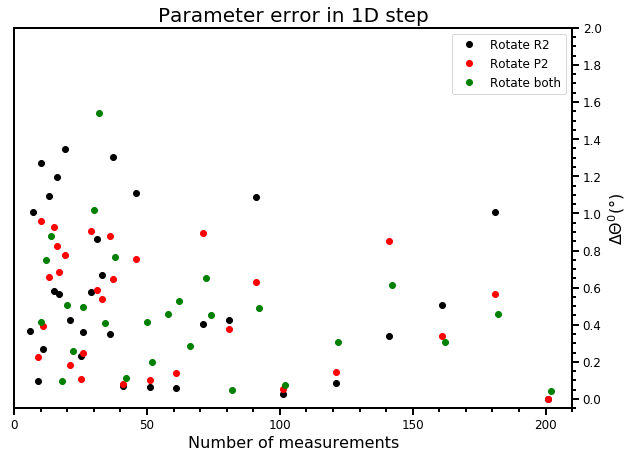

In [53]:
legend = ('Rotate R2', 'Rotate P2', 'Rotate both')
degrees = analysis.degrees

# Figura
fig, ax = plt.subplots(figsize=(10,7))

# Plot errors
ax.plot(N_1D, Dtheta_ret/degrees,'ko')
ax.plot(N_1D, Dtheta_pol/degrees,'ro')
ax.plot(N_1D*2, Dtheta_both/degrees,'go')

# Labels
plt.title('Parameter error in 1D step', fontsize=20)
plt.xlabel('Number of measurements', fontsize=16)
plt.ylabel('$\Delta\Theta^0 (\degree)$', fontsize=16)
plt.xlim([0, 210])
plt.ylim([-0.05, 2])
plt.legend(legend, fontsize=12)

# Ticks
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

# Cambiar ejes de lado
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

fig.savefig('1D param.png', dpi=600)
fig.savefig('1D param.pdf')
fig.savefig('1D param.eps')

## Pasos 2D 

Vamos a repetir el experimento anterior empleando el paso 5b, en el que rotamos dos elementos.

In [12]:
# reload(analysis)
N_2D, error_abs_2D, error_rel_2D, param_2D = analysis.Paso_5b_2D()

Nmax is 31
Current N is 6
Current N is 7
Current N is 10
Current N is 11
Current N is 12
Current N is 14
Current N is 16
Current N is 19
Current N is 23
Current N is 27
Current N is 31
Elapsed time is 5301.113609313965 s.


### Representación gráfica

Igual que con las medidas 1D, vamos a representar los resultados.

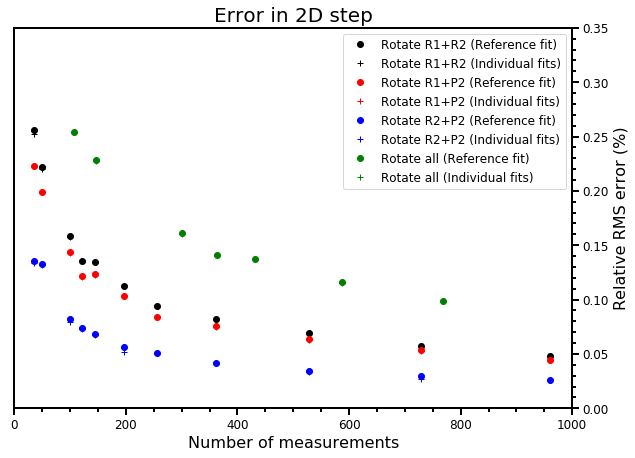

In [24]:
legend = ('Rotate R1+R2 (Reference fit)', 'Rotate R1+R2 (Individual fits)', 
          'Rotate R1+P2 (Reference fit)', 'Rotate R1+P2 (Individual fits)', 
          'Rotate R2+P2 (Reference fit)', 'Rotate R2+P2 (Individual fits)', 
          'Rotate all (Reference fit)', 'Rotate all (Individual fits)'
         )

# Figura
fig, ax = plt.subplots(figsize=(10,7))

# Plot errors
ax.plot(N_2D, error_abs_2D[0]*100,'ko')
ax.plot(N_2D, error_rel_2D[0]*100,'k+')
ax.plot(N_2D, error_abs_2D[1]*100,'ro')
ax.plot(N_2D, error_rel_2D[1]*100,'r+')
ax.plot(N_2D, error_abs_2D[2]*100,'bo')
ax.plot(N_2D, error_rel_2D[2]*100,'b+')
ax.plot(3*N_2D, error_abs_2D[3]*100,'go')
ax.plot(3*N_2D, error_rel_2D[3]*100,'g+')

# Labels
plt.title('Step 5b', fontsize=20)
plt.xlabel('Number of measurements', fontsize=16)
plt.ylabel('Relative RMS error (%)', fontsize=16)
plt.xlim([0, 1000])
plt.ylim([0, 0.35])
plt.legend(legend, fontsize=12)

# Ticks
ax.xaxis.set_major_locator(MultipleLocator(200))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))

# Cambiar ejes de lado
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

fig.savefig('2D errors.png', dpi=600)
fig.savefig('2D errors.pdf')
fig.savefig('2D errors.eps')

## Medida polarimetrica

Vamos a explorar lo mismo para obtener una medida polarimetrica.

In [22]:
N_good, error_good, dev_good = analysis.Paso_6a()
N_iter, error_iter, dev_iter = analysis.Paso_6a('Polarimeter_calibration_Iterative.npz')

The reference error ir: 0.00044296270352429506
Elapsed time is 278.25648832321167 s.
The reference error ir: 0.004500250270453927
Elapsed time is 281.2055172920227 s.


In [23]:
print(error_good)
print(error_iter)

[0.01912976 0.01205061 0.00957814 0.00812062 0.00690199 0.00616335
 0.00577935 0.00479831 0.00408441 0.00401665 0.00385954 0.00346685
 0.0031404  0.00325167 0.00292611 0.00269168 0.00261946 0.00257877
 0.00231365 0.00226743 0.00211073 0.0018662  0.0018314  0.00188031
 0.00170386 0.00163288 0.00155515 0.00136229 0.00143453 0.00117995
 0.00119569 0.00114138 0.0009064  0.00091481 0.00068683 0.00056856
 0.00044296]
[0.0308031  0.02215641 0.01618049 0.01476252 0.0118922  0.01144623
 0.01089787 0.00943004 0.00924736 0.00857751 0.0082617  0.00794818
 0.00768516 0.00706635 0.00733138 0.00660953 0.00686571 0.0067555
 0.00628594 0.00637761 0.00619697 0.00589355 0.00583178 0.00569313
 0.00523794 0.0052466  0.0054447  0.00520578 0.00503887 0.00543767
 0.00491428 0.00487371 0.00494283 0.00469505 0.00462077 0.00457612
 0.00450025]


In [17]:
legend = ('Simultaneous', 'Iterative')

# Lineas auxiliares
x1 = [0, 180, 180]
y1 = [0.001, 0.001, 0]
x2 = [0, 30, 30]
y2 = [0.01, 0.01, 0]
x3 = [30, 55, 55]
y3 = [0.01, 0.01, 0]


# Figura
fig, ax = plt.subplots(figsize=(10,7))

# Plot errors
ax.errorbar(N_good, error_good, dev_good, fmt='ko')
ax.errorbar(N_iter, error_iter, dev_iter, fmt='ro')
plt.legend(legend, fontsize=12)
ax.plot(x1, y1, 'g--')
ax.plot(x2, y2, 'b--')
ax.plot(x3, y3, 'b--')

# Labels
plt.title('Error in polarimetry experiments', fontsize=20)
plt.xlabel('Number of measurements', fontsize=16)
plt.ylabel('RMS error', fontsize=16)
plt.xlim([0, 210])
plt.ylim([0, 0.04])

# Ticks
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.002))

# Cambiar ejes de lado
# ax.yaxis.set_label_position("right")
# ax.yaxis.tick_right()

fig.savefig('polarimetry.png', dpi=600)
fig.savefig('polarimetry.pdf')
fig.savefig('polarimetry.eps')

In [21]:
N_good, error_good, dev_good = analysis.Paso_6a()
N_iter, error_iter, dev_iter = analysis.Paso_6a('Polarimeter_calibration_Iterative.npz')
print(error_good, dev_good)
print(error_iter, dev_iter)

The reference error ir: 0.00044296270352429506
Elapsed time is 1.5409033298492432 s.
The reference error ir: 0.004500250270453927
Elapsed time is 1.4796454906463623 s.
[0.05781651] [0.03210079]
[0.07398425] [0.03430598]


In [19]:
x = np.zeros(5)
x[0] = np.nan
x = x[~np.isnan(x)]
print(np.std(x))

0.0
